<a href="https://colab.research.google.com/github/pythagoras58/Quantizer/blob/main/Authentication_Resource_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 847.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.8 MB/s eta 0:00:00


In [3]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 28.2 MB/s eta 0:00:00


{'111': 512, '000': 512}


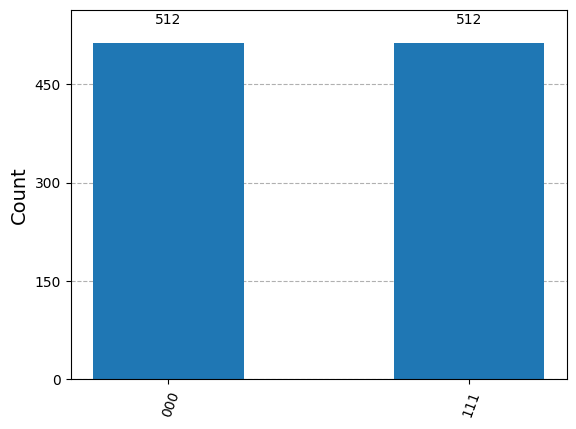

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

# Step 1: Define the quantum circuit
circuit = QuantumCircuit(3, 3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0, 1, 2], [0, 1, 2])

# Step 2: Set up the simulator
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)

# Step 3: Run the simulation
result = simulator.run(compiled_circuit).result()

# Step 4: Get the results and plot them
counts = result.get_counts(compiled_circuit)
print(counts)
plot_histogram(counts)


In [ ]:
circuit.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

# Challenge to Confirm the identity and the functionality of each party

In [6]:
!pip install pycryptodome
!pip install Crypto

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.1 MB/s eta 0:00:00


In [11]:
import hashlib
import time
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import os
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble
from qiskit_aer import AerSimulator
#from qiskit.utils import QuantumInstance
#from qiskit.algorithms import Shor

In [12]:
# Step 1: TTP Generates Nonce, Timestamp and User-Specific Data
def generate_challenge(tt_id):
    # Nonce
    nonce = os.urandom(16)

    # Timestamp
    timestamp = str(time.time())

    # User-specific data (ID)
    id_A = tt_id

    # Message M = (N, T, ID_A)
    message = f"{nonce.hex()}|{timestamp}|{id_A}"

    # Hashing the message
    message_hash = hashlib.sha256(message.encode()).hexdigest()

    return message, message_hash, nonce

In [13]:
# Step 2: Encrypt the Message and Hash with Shared Quantum Key
def encrypt_message(message, message_hash, quantum_key):
    key = hashlib.sha256(quantum_key.encode()).digest()  # Simulate quantum key usage
    cipher = AES.new(key, AES.MODE_CBC)
    ciphertext = cipher.encrypt(pad(f"{message}|{message_hash}".encode(), AES.block_size))
    return cipher.iv + ciphertext



In [14]:
# Step 3: Alice Decrypts and Verifies Integrity
def decrypt_and_verify(ciphertext, quantum_key):
    key = hashlib.sha256(quantum_key.encode()).digest()
    iv = ciphertext[:16]
    cipher = AES.new(key, AES.MODE_CBC, iv)
    decrypted = unpad(cipher.decrypt(ciphertext[16:]), AES.block_size).decode()

    # Split decrypted message and hash
    decrypted_message, decrypted_hash = decrypted.rsplit('|', 1)

    # Verify hash
    recalculated_hash = hashlib.sha256(decrypted_message.encode()).hexdigest()

    if recalculated_hash == decrypted_hash:
        print("Message Integrity Verified")
    else:
        print("Hash Mismatch: Integrity Check Failed")

    return decrypted_message